# Exercise C1.12: Computer Generation of Autocovariance Sequences

Autocovariance sequences are two–sided sequences. In this exercise we develop computer techniques for generating two–sided ACSs.

Let y(t) be the output of the linear system in Figure 1.1 with filter $H(z) = \frac{(1 + b_1z^{-1})}{(1 + a_1z^{−1})}$, and whose input is zero mean white noise with variance $σ^2$.

- (b) Plot $r(k)$ for $−20 ≤ k ≤ 20$ and for various values of $a_1$ and $b_1$. Notice that
  the tails of $r(k)$ decay at a rate dictated by $|a_1|$.
- (c) When $a_1 ≃ b_1$ and $σ^2 = 1$, then $r(k) ≃ δ_{k,0}$. Verify this for $a_1 = −0.95$,
  $b_1 = −0.9$, and for $a_1 = −0.75$, $b_1 = −0.7$.


In [1]:
# Import necessary modules
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


$$
r(k) = \frac{\sigma^2}{1-|a_1|^2}\{( 1-\frac{b_1}{a_1} )(1-b_1^*a_1) \}(-a_1)^k
$$

$$
r(0) = \frac{\sigma^2}{1-|a_1|^2} \{|1-b_1a_1^*|^2 + |b_1|^2(1-|a_1|^2) \}
$$


## Part (b)


## Part (c)


In [2]:
# a1 = -0.95
# b1 = -0.90
# a = [1, a1]
# b = [1, b1]
# sigma = 1


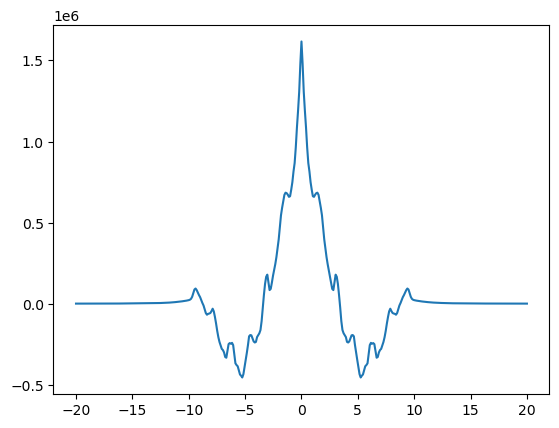

In [3]:
a_value = -0.95
b_value = -0.9
a = [1, a_value]
b = [1, b_value]
t,h = signal.impulse([b,a])
e = np.random.normal(0, 1, len(h))

y = np.convolve(h,e)
r = np.correlate(y,y,mode='full')
# print(r)
k = np.linspace(-20,20,len(r))

# da = xr.DataArray(data=r, dims=['k'],coords=[k])

fig, ax = plt.subplots()
ax.plot(k, r)
plt.show()

In [4]:
def rk(a1, b1, sigma, k):
    term1 = sigma**2/(1-np.abs(a1)**2)
    r = term1*( (1 - (b1/a1)) * (1 - np.conjugate(b1)*a1) ) * (-a1)**k
    return r/r[0]

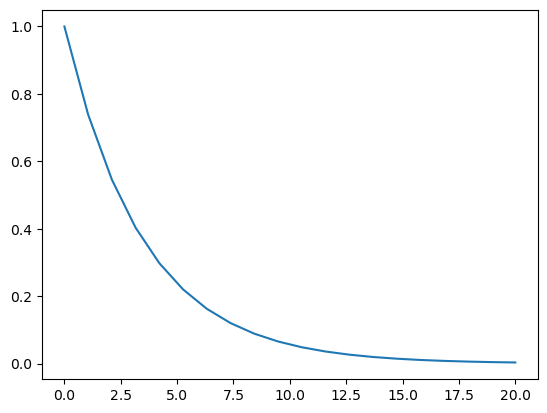

In [5]:
a1 = -0.75
b1 = -0.9
sigma = 1
k = np.linspace(0, 20, 20)
r = rk(a1, b1, sigma, k)

fig, ax = plt.subplots()
ax.plot(k, r)
plt.show()